## 주성분 분석

- 차원 축소 - 데이터 크기감소, 과대적합 방지를 통해 학습모델 향상

- 주성분 분석 - 분산의 큰 방향을 나타내는 벡터(주성분)에 데이터를 투영해 차원 축소

### PCA 클래스

In [1]:
# 데이터 준비
import numpy as np
fruits=np.load('dataset/fruits_300.npy')
fruits_2d=fruits.reshape(-1, 100*100)

In [2]:
# 모델 학습
from sklearn.decomposition import PCA
pca=PCA(n_components=50)    # n_components=50: 주성분의 개수 지정
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
# PCA가 찾은 주성분 배열
print(pca.components_.shape)

(50, 10000)


In [4]:
# 각 클러스터가 어떤 이미지를 나타냈는지 그림으로 출력
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n=len(arr)  # n은 샘플 개수
    # 한 줄에 10개씩 이미지 생성, 샘플 개수를 10으로 나누어 전체 행 개수 계싼
    rows=int(np.ceil(n/10))
    # 행이 1개면 열의 개수는 샘플 개수. 그렇지 않으면 10개
    cols=n if rows<2 else 10
    fig, axs =plt.subplots(rows, cols, figsize=(cols*ratio,rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10+j<n:    # n개 까지만 이미지 출력
                axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

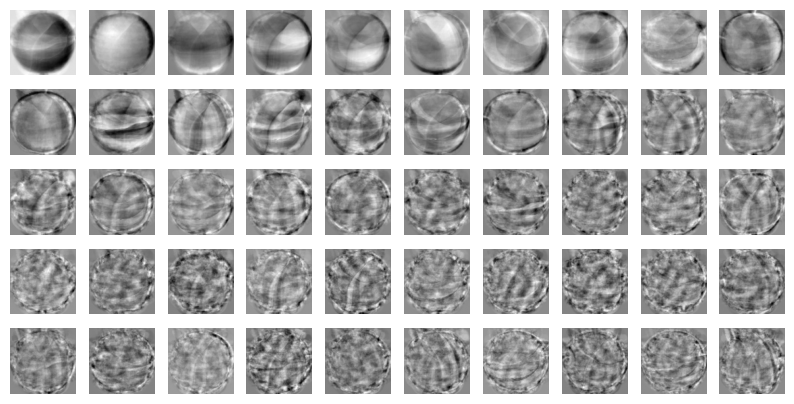

In [5]:
# 주성분을 그림으로 출력
draw_fruits(pca. components_.reshape(-1, 100, 100))

In [ ]:
# 원본 데이터를 차원 축소(10000>50)
print(fruits_2d.shape)

fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


### 원본 데이터 재구성

In [8]:
# 차원 축소한 데이터로 특성 복원
fruits_inverse=pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


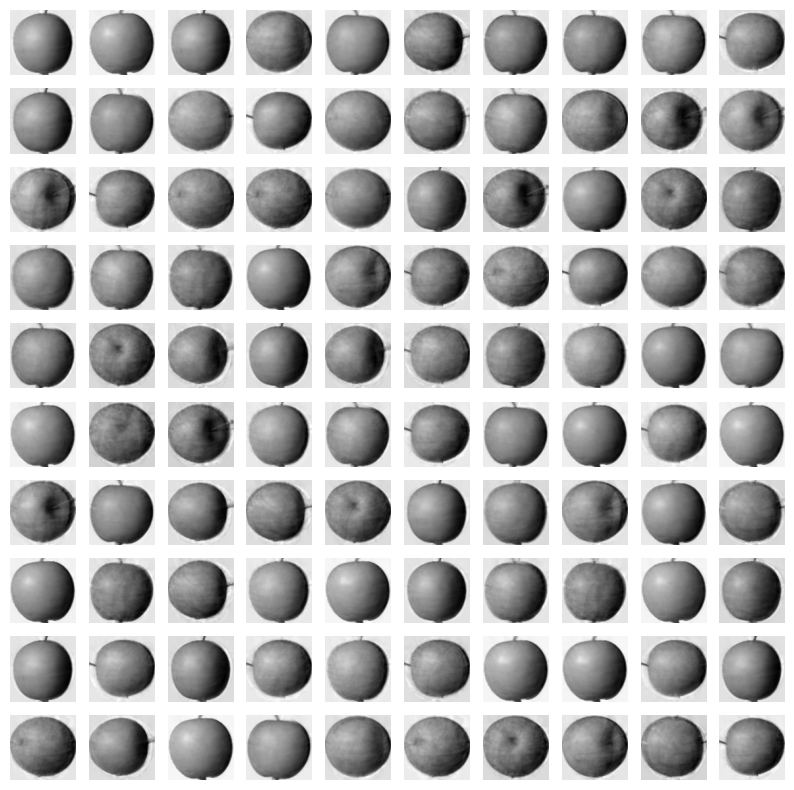

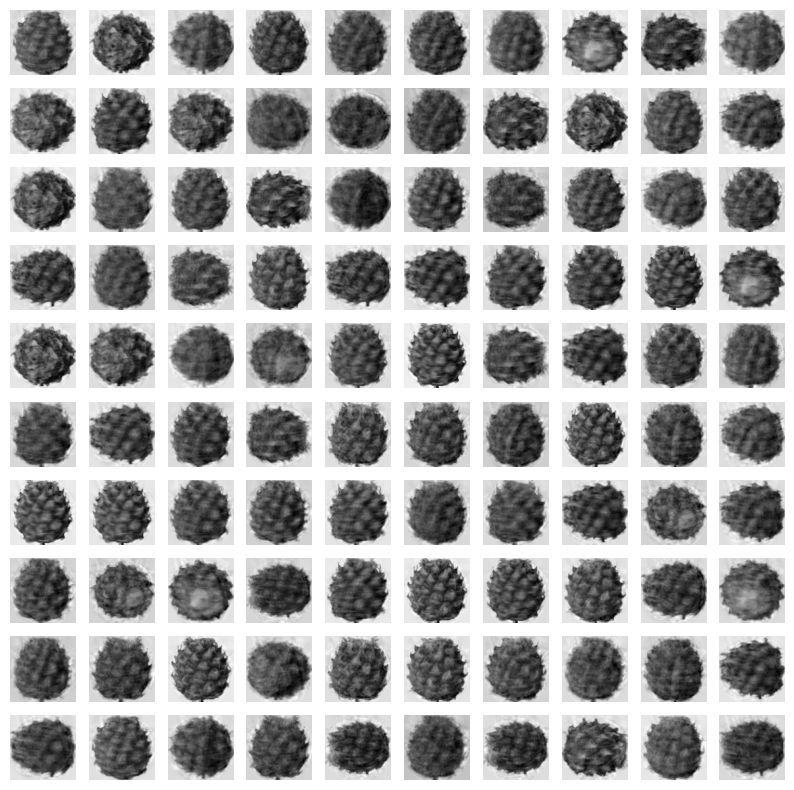

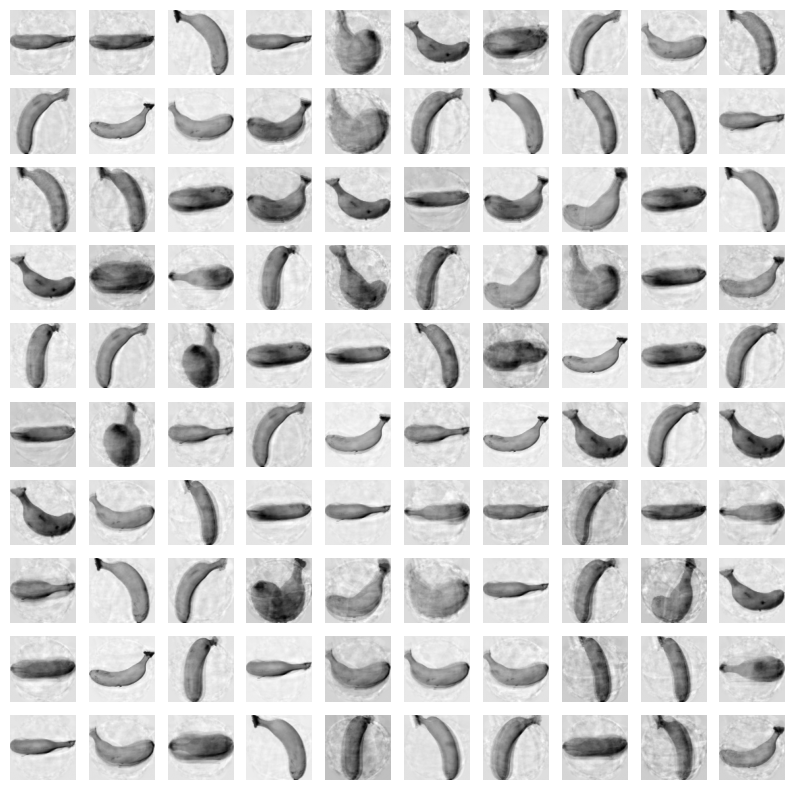

In [9]:
# 재구성한 데이터 이미지로 출력
fruits_reconstruct=fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

### 설명된 분산 - 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [ ]:
print(np.sum(pca.explained_variance_ratio_))    # 92%가 넘는 분산을 유지

0.921529203481026


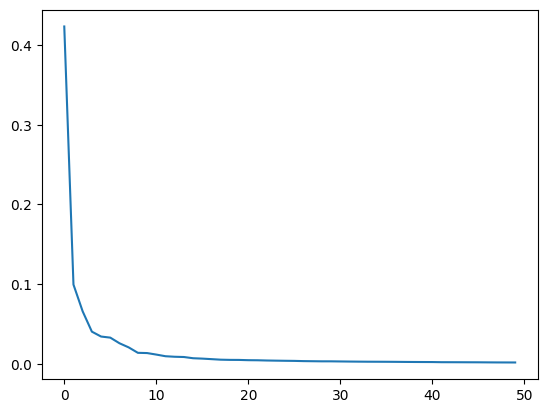

In [11]:
# 주성분의 개수에 따른 설명된 분산 그래프 출력
plt.plot(pca.explained_variance_ratio_)
plt.show()

### 로지스틱 회귀 모델과 함께 사용

In [12]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [14]:
# 지도 학습 모델을 위한 타깃값 생성
target=np.array([0]*100 +  [1]*100 + [2]*100)

In [15]:
# 원본 데이터로 교차검증 수행
from sklearn.model_selection import cross_validate
scores=cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.2078099250793457


In [16]:
# 차원 축소한 데이터로 교차검증 수행
scores=cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.013496065139770507


In [17]:
# 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델 생성
pca=PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [18]:
# 주성분 개수 확인
print(pca.n_components_)

2


In [19]:
# 원본 데이터 변환
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [20]:
# 차원 축소 데이터로 교차 검증
scores=cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.02717561721801758


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터 찾기
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


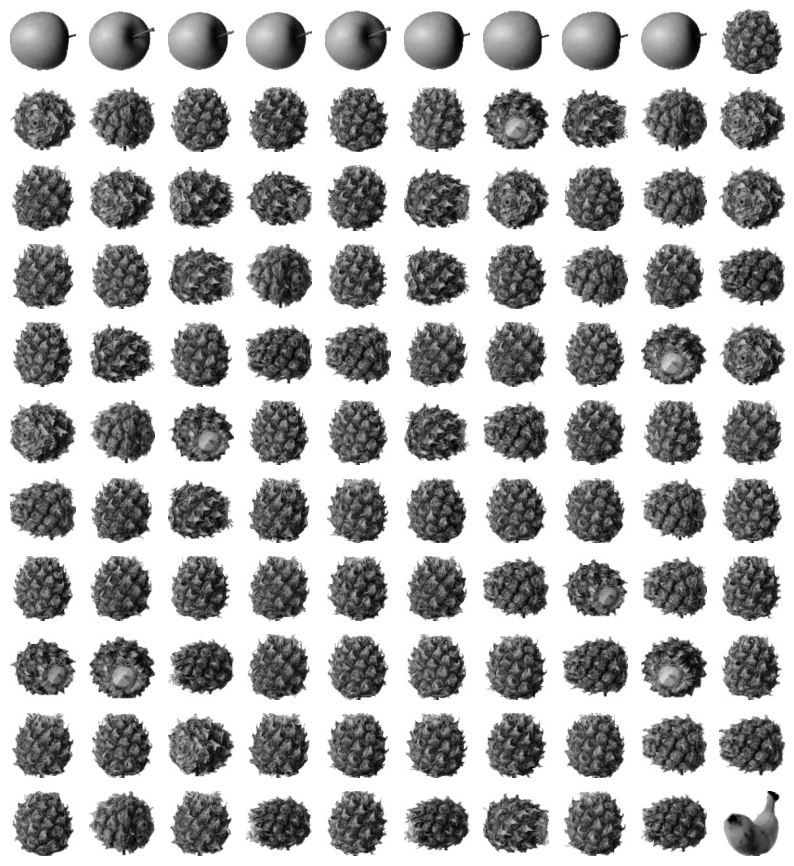

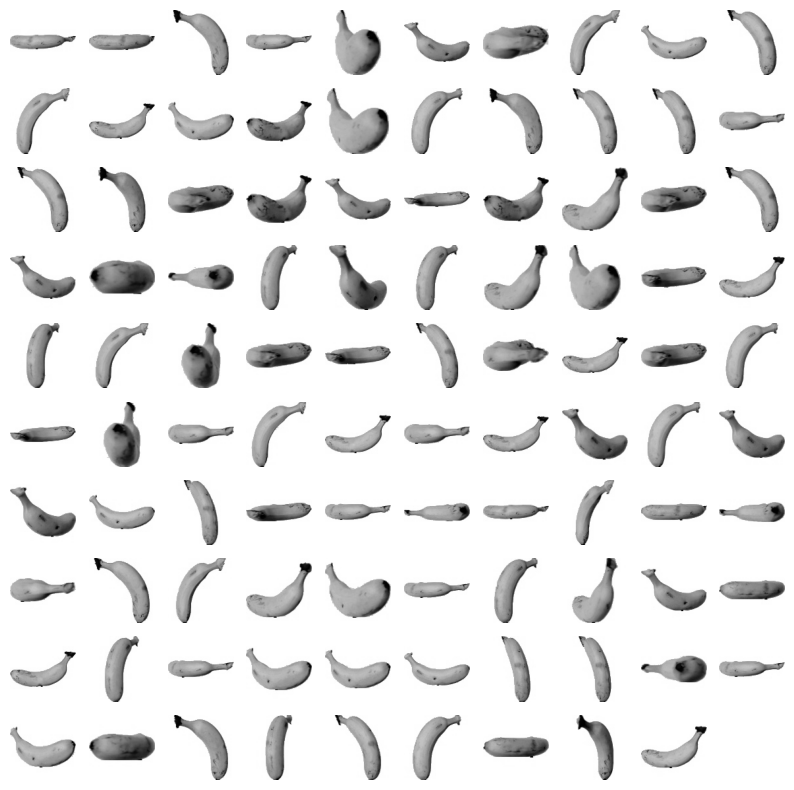

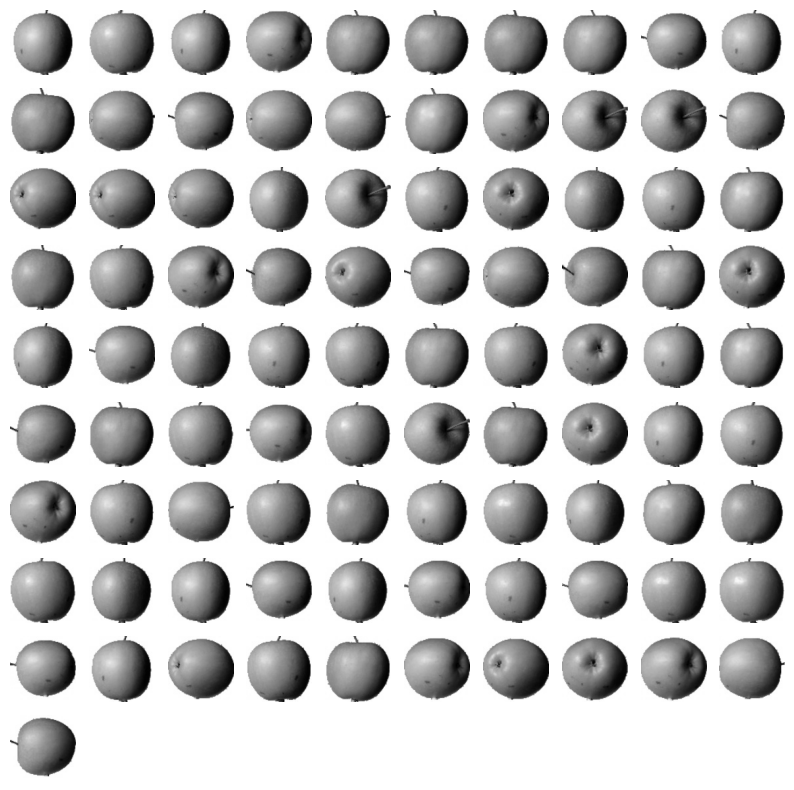

In [22]:
# 레이블을 사용해 이미지 출력
for label in range(0, 3):
    draw_fruits(fruits[km.labels_==label])
    print("\n")

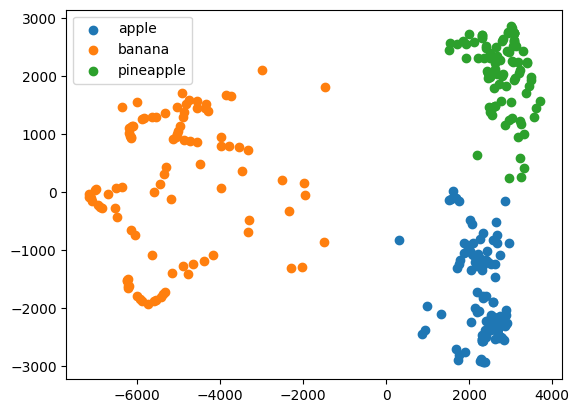

In [23]:
# 2개의 특성으로 산점도 시각화
for label in range(0, 3):
    data=fruits_pca[km.labels_==label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()